# cost of NLP model development

- create labelled dataset: expensive human labor

- train model: computation (PFLOPs)

- inference: user computation time (ms/example)

# Metrics

## perplexity 困惑度

**perplexity**

- Perplexity measures how well a language model predicts a sequence of words by quantifying the **average number of choices (the number of equally likely choices ) the model has for each word in the sequence**.

- the lower perplexity, the better the model: A lower perplexity means that the model is more certain about the next word in the sequence, because it assigns a higher probability to the correct word and lower probabilities to other words.

**Definition**

Perplexity of a language model parametrized by $\theta$ is defined as n-power root of likelihood (joint probability) of a sequence of words $w_1, w_2, ..., w_N$ under such model

$$
\text{Perplexity}(\theta)=\sqrt[n]{\prod _{i=1}^N p_{\theta} (w_i | w_{1:i-1})}
$$

where $p_{\theta}(w_i | w_{1:i-1})$ represents conditional probability of observing word $w_i$ given the previous words $w_{1:i-1}$ (context), according to the language model parametrized by $\theta$

**interpretation**

- log perplexity is Negative log likelihood

    $$
    \log(\text{Perplexity}(\theta))=\log \left ( \prod _{i=1}^N p_{\theta} (w_i | w_{1:i-1}) \right )^{-\frac{1}{N}}=-\frac{1}{N}\log \left ( \prod _{i=1}^N p_{\theta} (w_i | w_{1:i-1}) \right )
    $$

- perplexity is exponential of average cross-entropy loss

    $$
    \begin{aligned}
    \text{Perplexity}(\theta) &= \exp \left[\log(\text{Perplexity}(\theta))\right]\\[1em]
    &= \exp\left[-\frac{1}{N}\log \left ( \prod_{i=1}^N p_{\theta} (w_i | w_{1:i-1}) \right )\right]\\[1em]
    &= \exp\left[\frac{1}{N}\sum_{i=1}^N - \log p_{\theta} (w_i | w_{1:i-1})\right]
    \end{aligned}
    $$

- e.g. if perplexity is 100, then model is as uncertain about the next word in a sequence as it would be if there were 100 equally likely words to pick from.

$$
\text{perplexity}(\theta)=\left ( \prod _{i=1}^{100} p_{\theta} (w_i | w_{1:i-1}) \right )^{-\frac{1}{100}}=\left ( \left(\frac{1}{100}\right)^{100}  \right )^{-\frac{1}{100}}=100
$$

## BLEU

BLEU (BiLingual Evaluation Understudy) score

$$
\text{BLEU}=\min(1, \exp(1-\frac{len(ref)}{len(pred)})) \left(\prod_{n=1}^4 \text{n-gram precision}\right)^{1/4}
$$

$\min(1, \exp(1-\frac{len(ref)}{len(pred)}))$ is length penalty

# language unit

character, word, sentence, paragraph, document

Subword: A unit between character and word, representing meaningful parts or morphemes. Used to handle out-of-vocabulary words, morphologically rich languages, and improve generalization. Algorithms like BPE, WordPiece, and SentencePiece split words based on frequency.

Token: A single unit in text, typically a word, subword, or character. Tokenization breaks text into smaller units called tokens.

Gram: can be n-gram characters or n-gram tokens, E.g., bigram tokens in sentence "I like cats." are "I like", "like cats" and "cats."

Segment: A continuous part of text divided by semantic or syntactic boundaries. Can be interchangeable with "sentence" or "phrase".

Sentence: A grammatically complete sequence of words, typically separated by punctuation marks.

# language model

## definition

- A language model is designed to assign  a probability distribution over a sequence of words, ahieved by modeling the conditional probability of a word given its preceding words (history) in the sequence.

  $$
  p(w_1,...,w_n)=p(w_1)p(w_2|w_1)...p(w_n|w_1,...,w_{n-1})
  $$


- As the length of the sequence (n) increases, the number of histories (possible unique sequences of words) grow exponentially as 

  $$|V|^{n-1}$$

  where $|V|$ is vocabulary size


-  total number of free parameters in the model for the last conditional probability is 

  $$(|V|-1)|V|^{n-1}$$


- To reduce the num of params, we need to group histories

## Unigram, Bigram, Trigram

- let $\pi_n: V^n \rightarrow C$ be a mapping from word seq of length $n$ to a finite set $C$ (a context)


- then language model becomes

    $$
    p(w_{n+1}|w_1,...,w_n)=p(w_{n+1}|\pi_n(w_1,...,w_n))
    $$


- num of params is

    $$
    O(|V|\cdot |C|)
    $$

    where $|C|$ is context window size

- unigrams: words are independent with each other, we don't listen to any history

$$
\pi(w_1,...,w_n)=\varnothing 
$$

    

- bigrams: only listen to the last word $w_n$

$$
\pi(w_1,...,w_n)=w_n
$$

   
- trigrams: only listen to the last 2 words $w_{n-1}, w_n$

$$
\pi(w_1,...,w_n)=(w_{n-1}, w_n)
$$

    
- num of prams grows as 

$$O(|V|), O(|V|^2), O(|V|^3)$$


- num of prams in topics for LDA

    $$
    O(K \cdot |V|)
    $$

    where $K$ is num of topics in a corpus

### estimate params

- MLE: problematic


- Bayesian - Dirichlet prior: often used

### MLE

- the maximum likelihood estimate of a trigram model is

$$
\hat p(w_3 | w_1, w_2) =\frac{p(w_1,w_2,w_3)}{p(w_1,w_2)}= \frac{\frac{\text{count}(w_1,w_2,w_3)}{ \#trigram}}{\frac{\text{count}(w_1,w_2)}{\# bigram}} \approx\frac{\text{count}(w_1,w_2,w_3)}{\text{count}(w_1,w_2)}
$$


- problem: in training set, word 1, 2, 3 may not occur together, which leads to $\text{count}(w_1,w_2,w_3)=0$
    

- probabilities need to be **"smoothed"** to avoid zeros

### Bayesian: Dirichlet prior

$\eta \in (-3, 10)$ is added weight

$$
\hat p(w_3 | w_1, w_2) \propto \text{count}(w_1,w_2,w_3) + \eta
$$

## mixture model

a mixture model:  

$$
\begin{align}
p(w_3 | w_1, w_2) 
&=\text{trigram model + bigram model + unigram model} \\[1em]
&= \lambda _3 \hat p(w_3 | w_1, w_2)  + \lambda _2 \hat p(w_3 | w_2) +\lambda _1 \hat p(w_3 ) \\[1em]
\end{align}
$$


where $\lambda_i$ is weight for model $i$

# class-based bigram model

grouping words into **classes** and estimating the **class-based model** gives meaningful clusters

model:

$$
p(w_2 | w_1) = p(\text{class}(w_2)|\text{class}(w_1)) p(w_2|\text{class}(w_2))=p(c_2|c_1)p(w_2|c_2)
$$

where $c_i$ is class (topic) for word $w_i$


- use bottom-up agglomerative clustering to group words


- bigram model gives highest likelihood (no grouping)


- each step: merge the pair of classes that decrease likelihood (perplexity) of the data least
    

# Semantics is study of meaning

# What's *meaning*?

- Leonard Bloomfield: Yale professor of Structuralism Linguistics

    view: words have a **precise and technical** meaning that can only be uncovered by **experts** through careful study, ordinary people can't know true meaning of words

# Ontologies

- ontologies implement Bloomfield's idea of meaning

    a huge database that contains everything a typical person might know in a **machine-readable** format

- e.g.

    - WordNet: a database that contains relationships between different word meanings

    - Amazon Alexa: ontology objects convert natural-language requests into an abstract representation of what the user wants Alex to do

# Geometry of words

## Feature Spaces

In [ ]:
# define following 4 kinds of pizza vectors. 
# feature: 13 kinds of toppings
import numpy as np
# white pie with meatballs
p = np.array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0])

# plain white pie
q = np.array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

# red pie with meatballs
r = np.array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

# pain red pie
s = np.array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Addition

$$\mathbf{p} + \mathbf{q}$$

In [ ]:
p + q # addition of toppings of 2 pizzas

array([0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0])

Hadamard product 

$$\mathbf{p} \odot \mathbf{q}$$

In [ ]:
p * q # intersection of toppings of 2 pizzas

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

$$\text{max}(\mathbf{p}, \mathbf{q})$$

In [ ]:
np.maximum(p, q) # union of toppings of 2 pizzas

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0])

Dot product

$$\mathbf{p} \cdot \mathbf{q}=\mathbf{p}^T \mathbf{q}$$

In [ ]:
p@q # number of overlap toppings of 2 pizzas


2

Subtraction

$$\mathbf{p} - \mathbf{q}$$

In [ ]:
p-q 

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

- meaning of subtraction

    some elements of resulting vector after subtraction may be -1

    you may think it doesn't make sense for a pizza having -1 units of topping,
    
    but subtraction can describe **analogies**

- in NLP, often rewrite equation to be 

    $$\mathbf{p} - \mathbf{q} + \mathbf{s} = \mathbf{r}$$

    vector $- \mathbf{q} + \mathbf{s} $ represents the operation of replacing the properties of a plain white pie ($\mathbf{q}$) with those of a plain red pie ($\mathbf{s}$)

    white pie with meatballs VS. plain white pie  = red pie with meatballs VS. plain red pie

In [ ]:
np.isclose(p-q+s, r)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

## PCA: Dimensionality Reduction

- use PCA to embed pizza vectors from $\mathbb{R}^{13}$ into $\mathbb{R}^2$


- this embedding is approximately **isometric** w.r.t. absolute value of cosine distance and Euclidean distance
    
    
- the closer 2 pizzas appear to one another in the plot,

    the greater their cosine similarity
        
        
- Note: the 2 axes have no particular interpretation, 
    
    coz they're both hidden/latent variables, 
        
    so the actual coordinate values don't mean anything,
    
    the only important thing is **distance between points**

In [ ]:
# install Sklean in silent mode and automatically say yes
# !yes|pip install -U scikit-learn -q
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
import pandas as pd 

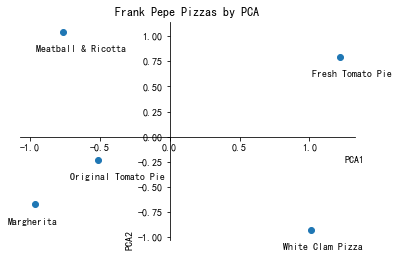

In [ ]:
# create pizza matrix P
row_idx = ['White Clam Pizza', 'Original Tomato Pie', 'Margherita', 'Fresh Tomato Pie', 'Meatball & Ricotta']
p = np.array([
    [0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0],
    [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
    [0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0],
    [1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1]])

df = pd.DataFrame(data=p, index=row_idx)

# create a PCA with Number of components to keep 2
pca = PCA(n_components=2)

# get 2D embedding of pizza matrix
embedded = pca.fit_transform(df)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# create a scatter plot for PCA-embedded pizza vectors
ax.scatter(embedded[:,0], embedded[:,1])

# Move left y-axis and bottom x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')



# annotate all the points in the scatterplot using their row index
for i, label in enumerate(row_idx):
    ax.annotate(label, (embedded[i, 0], embedded[i, 1]), (embedded[i, 0]-0.2, embedded[i, 1]-0.2), fontsize=10)

plt.title("Frank Pepe Pizzas by PCA")
plt.xlabel("PCA1", x=1)
plt.ylabel("PCA2", y=0)
plt.show()


- call `components_` attribute to see the 2 principal components used by PCA object `pca`

In [ ]:
pca.components_

array([[ 0.28534923, -0.52316423, -0.22554482,  0.23781501, -0.22554482,
         0.28534923,  0.52316423, -0.        , -0.17801059,  0.10733863,
        -0.        ,  0.23781501, -0.17801059],
       [ 0.25736834,  0.04375923, -0.2192067 , -0.30112757, -0.2192067 ,
         0.25736834, -0.04375923,  0.        ,  0.33928921,  0.59665754,
         0.        , -0.30112757,  0.33928921]])

In [ ]:
# verify these 2 directions are both unit vextors
np.linalg.norm(pca.components_, axis=1)

array([1., 1.])